In [1]:
from autograph import autograph
import matplotlib.pyplot as plt

def draw_adjacency_matrix(
    graph: autograph.KnowledgeGraph,
    iteration_number: int,
    split_point: int | None = None
):
    matrix = graph.as_matrix()
    plt.imshow(matrix, cmap="Greys", interpolation="none")

    if split_point:
        split_point = split_point * len(matrix) / graph.num_vertices()
        plt.axvline(x = split_point, color = "red")
        
    plt.title(f"Iteration {iteration_number}")
    plt.show()

In [2]:
import math

def show_progression_images(
    graph: autograph.KnowledgeGraph,
    num_iterations: int,
    shuffle_seed: int,
    factor: float,
    min_cluster_size: int
):
    graph.shuffle_vertex_ids(shuffle_seed)
    draw_adjacency_matrix(graph, 0)

    for i in range(num_iterations):
        weights = graph.cluster(factor)
        log_weights = [math.log(w) for w in weights if w > 0.0]
        if len(weights) > len(log_weights):
            print(f"WARNING: {len(weights) - len(log_weights)} weights were 0")
        log_derivative = [b - a for a, b in zip(log_weights, log_weights[1:])]

        split_point = min(enumerate(log_derivative), key = lambda v: v[1])
        split_point, _ = split_point
        if split_point < min_cluster_size or split_point >= len(log_derivative) - min_cluster_size:
            split_point = None

        draw_adjacency_matrix(graph, i + 1)

        plt.plot(log_derivative)
        plt.title(f"Iteration {i + 1} log gradient")
        plt.show()

        densities = graph.split_density()
        plt.plot(densities)
        plt.title(f"Iteration {i + 1} densities")
        plt.show()

In [3]:
import time

starttime = time.time()
builder = autograph.GraphBuilder(0)
builder.add_dense_cluster(100_000, 0.001)
builder.add_dense_cluster(100_000, 0.001)
builder.add_random_link(0, 1)
graph = builder.finalize_graph()
time.time() - starttime

22.94360613822937

In [5]:
starttime = time.time()
graph.split_density()
time.time() - starttime

3.9998700618743896

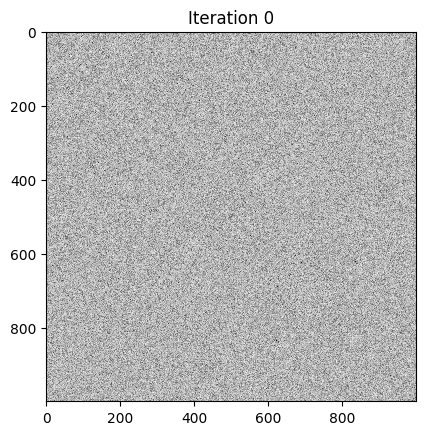

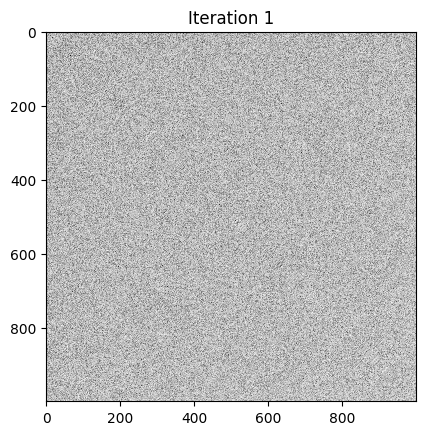

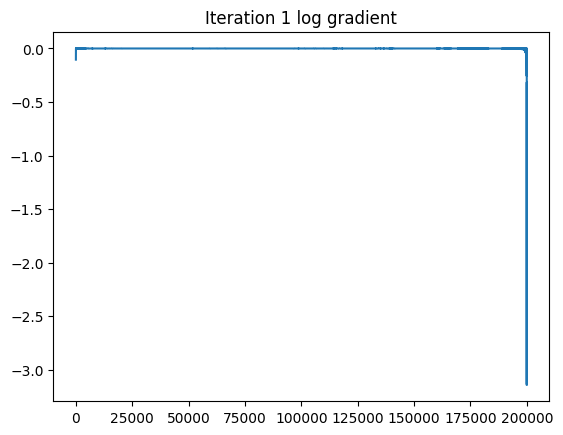

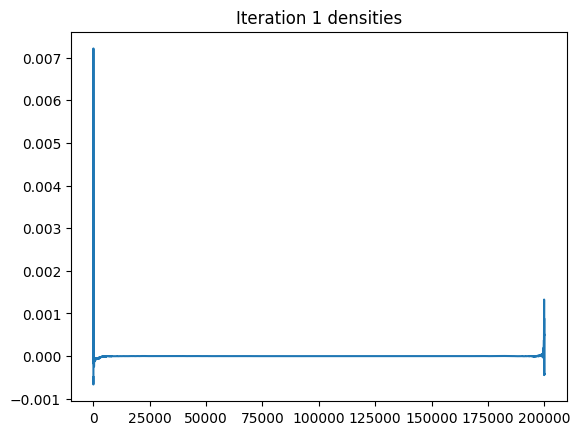

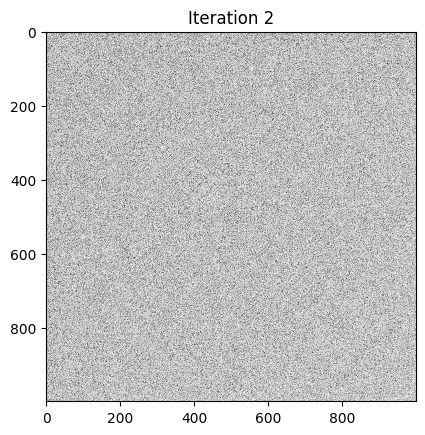

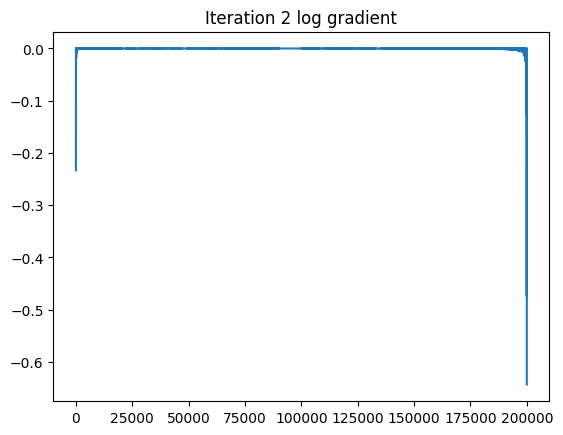

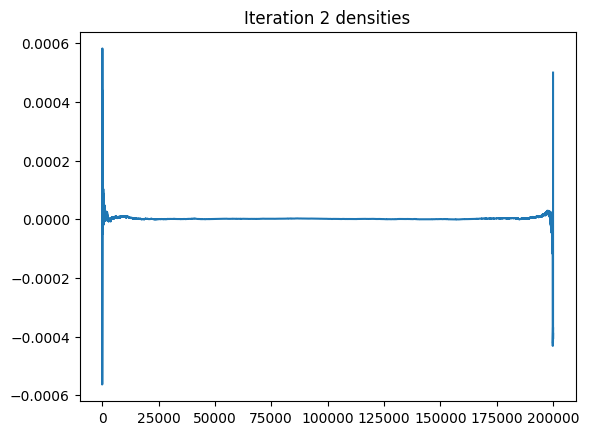

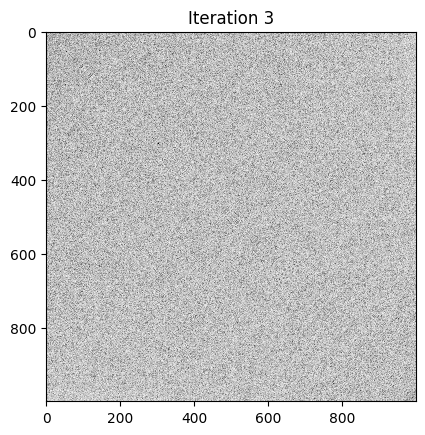

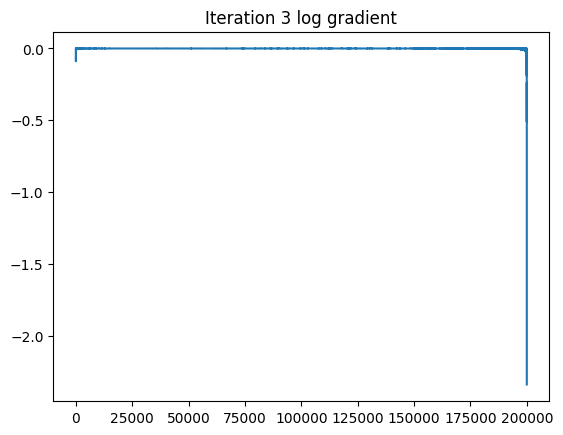

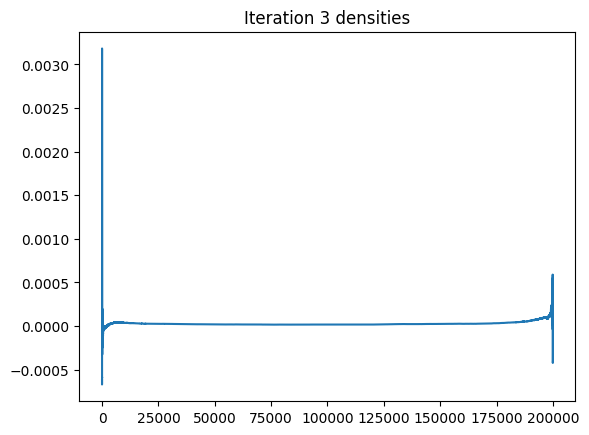

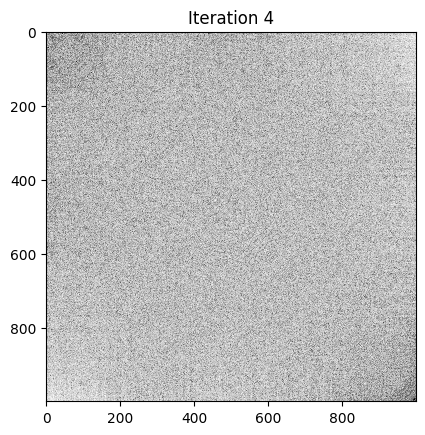

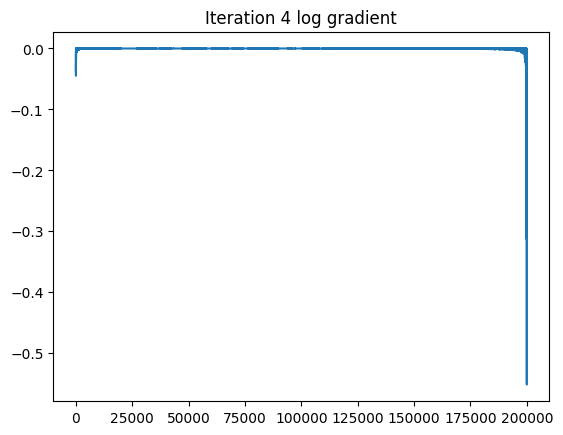

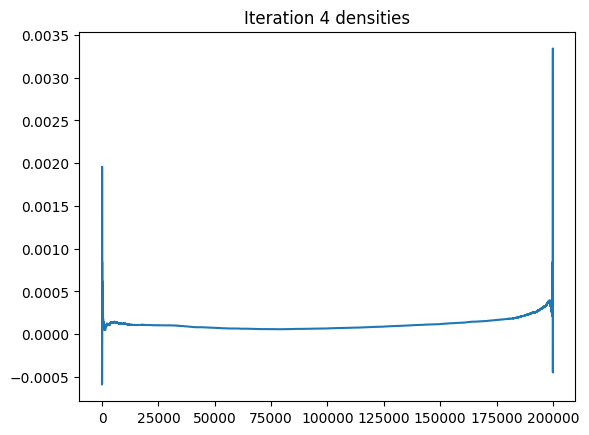

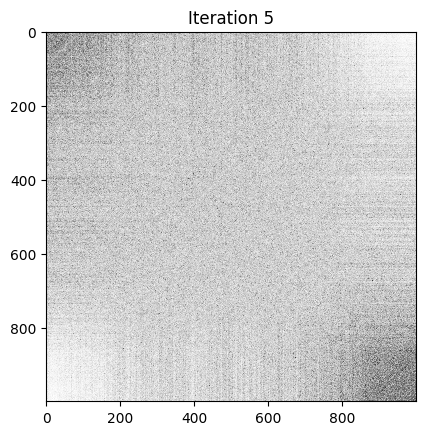

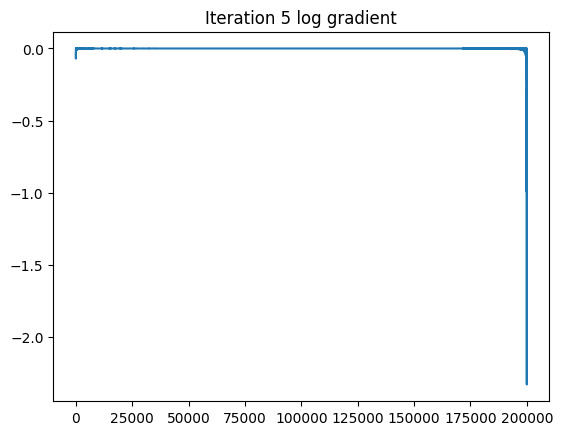

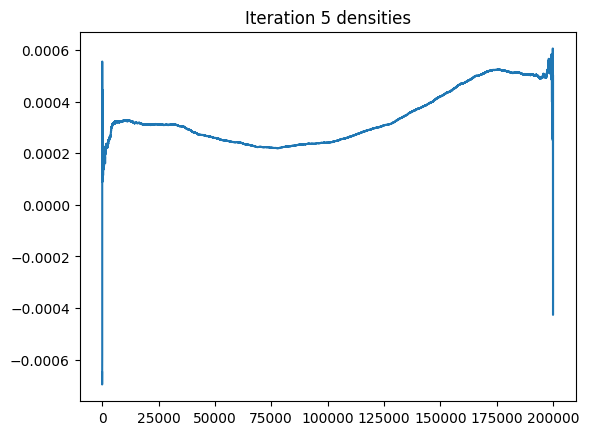

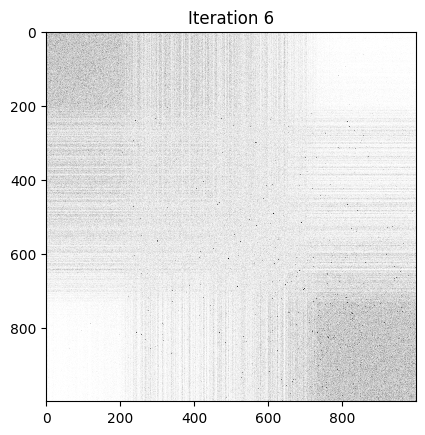

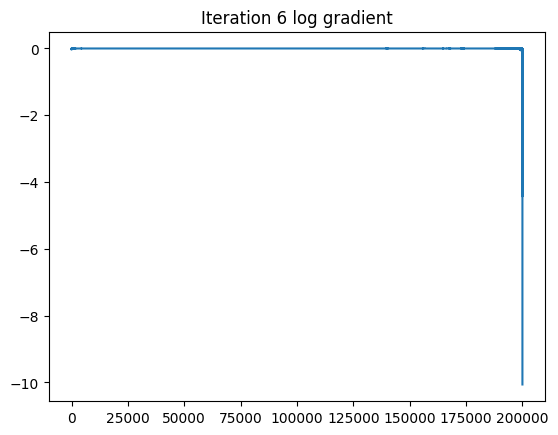

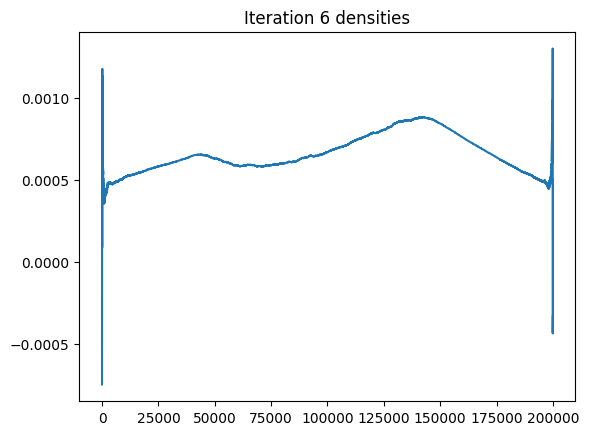

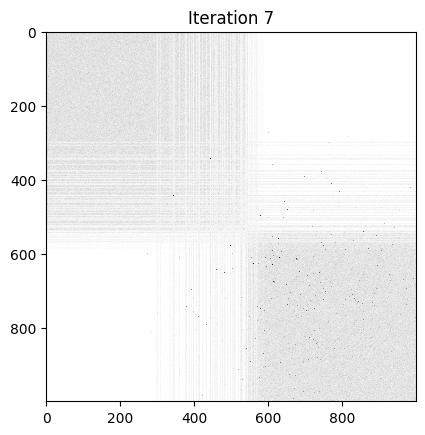

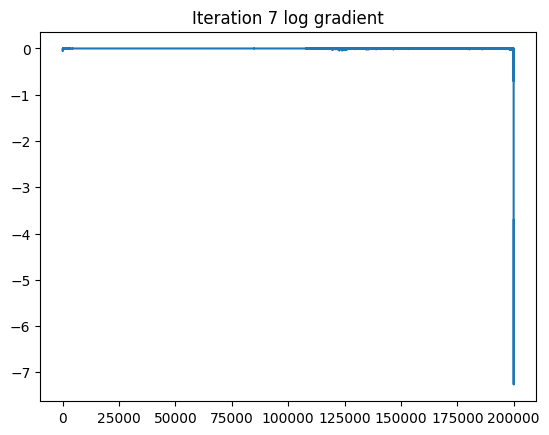

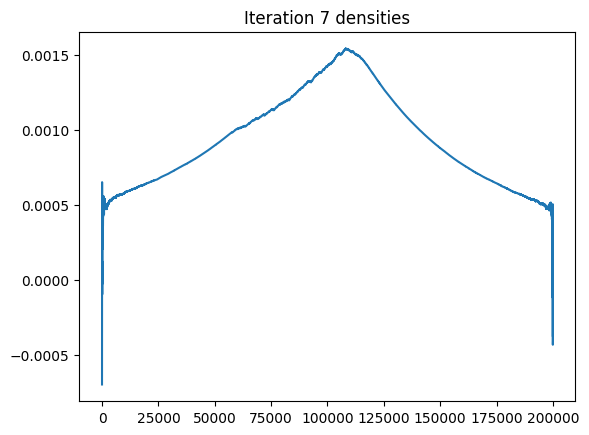

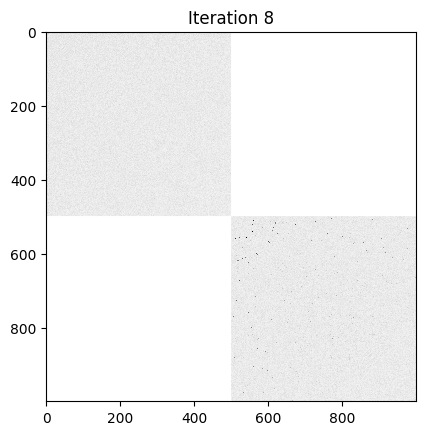

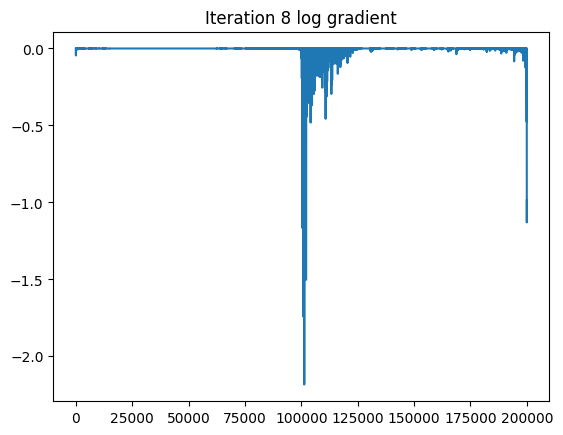

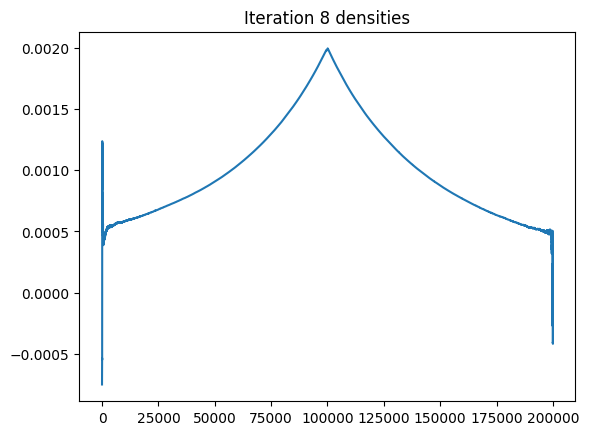

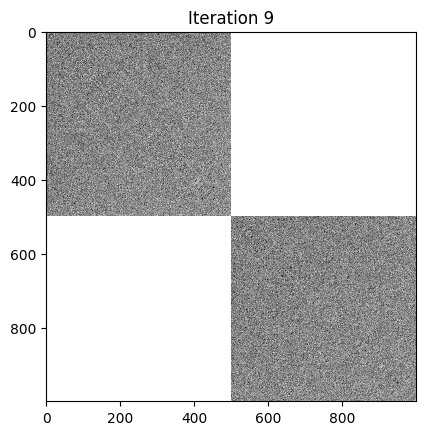

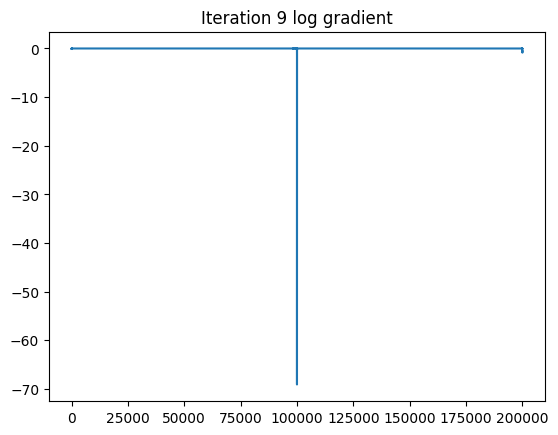

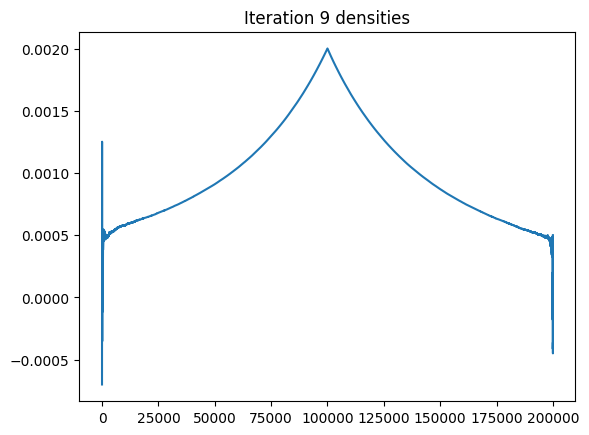

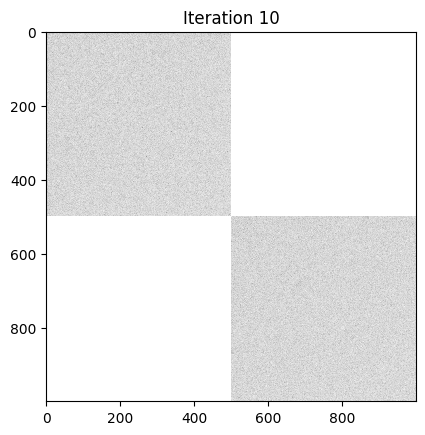

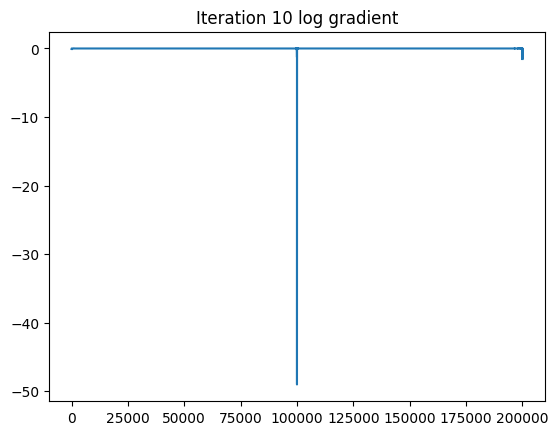

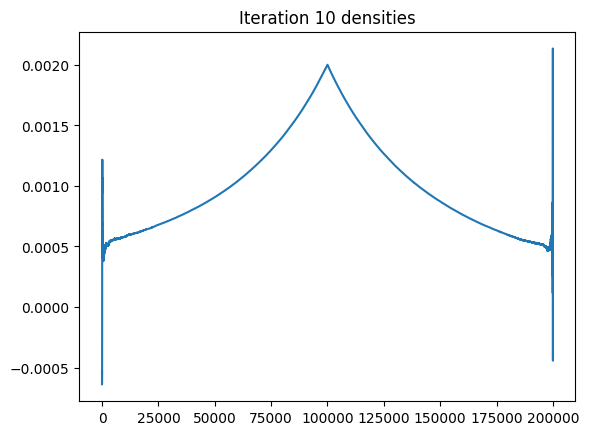

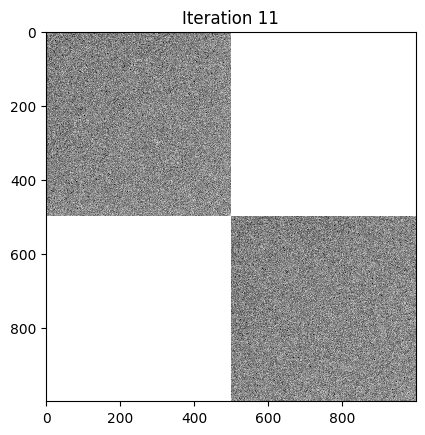

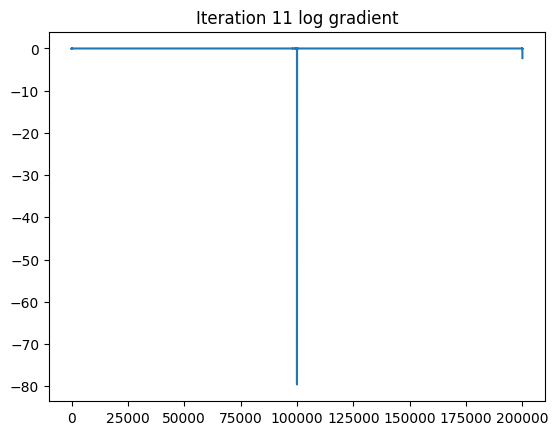

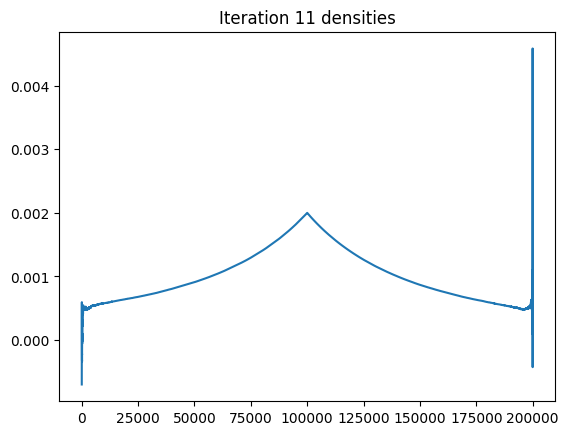

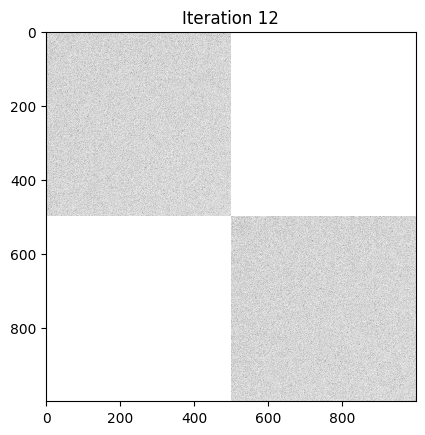

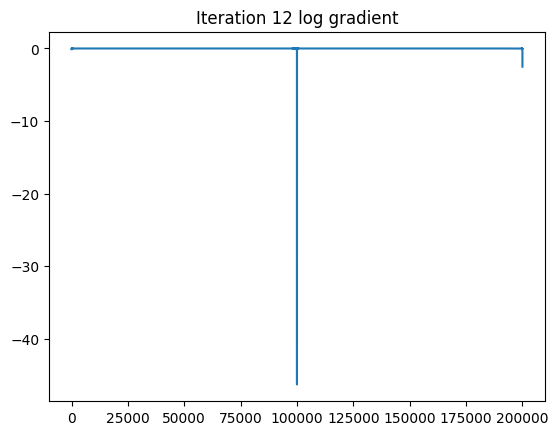

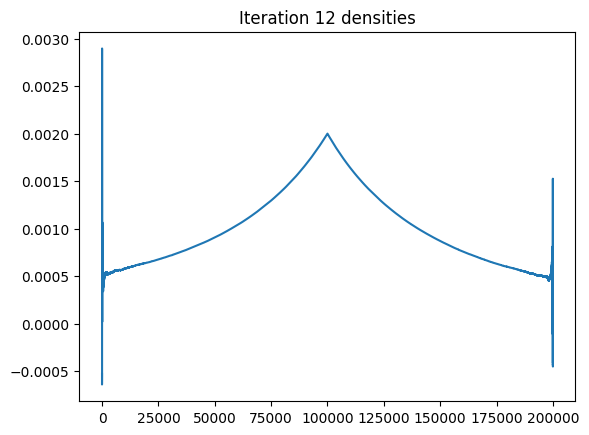

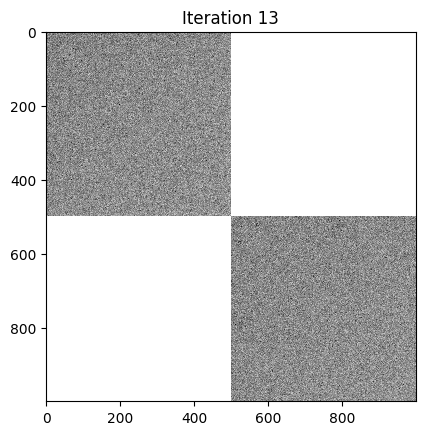

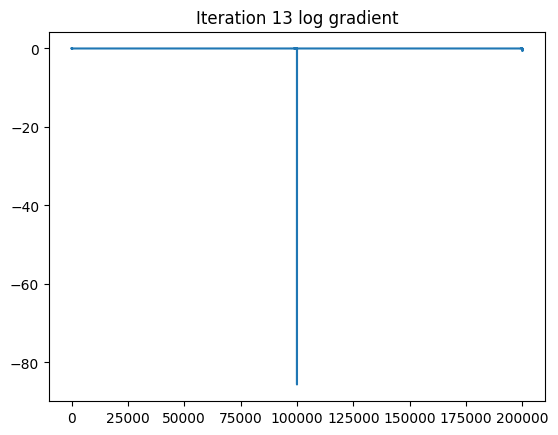

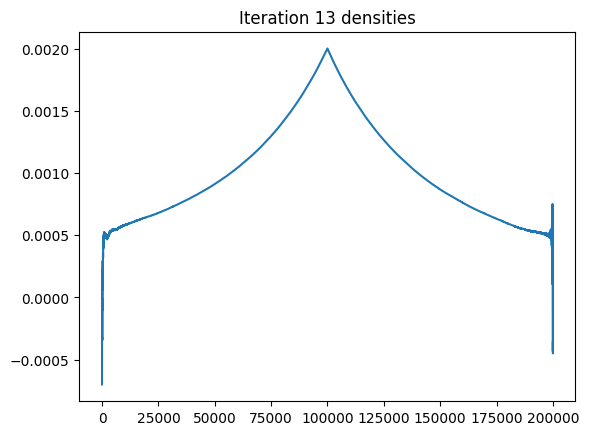

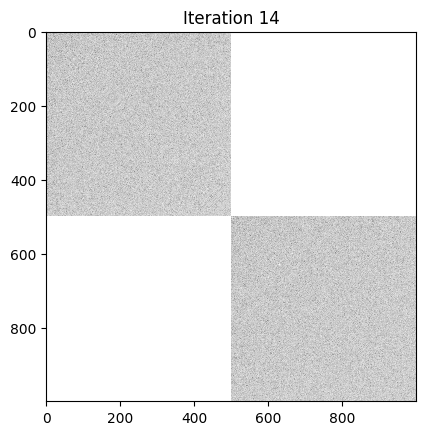

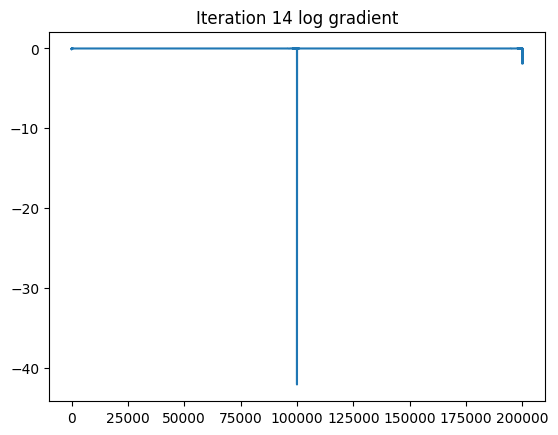

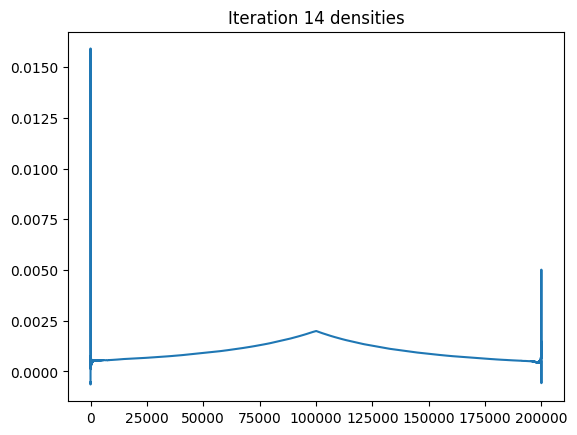

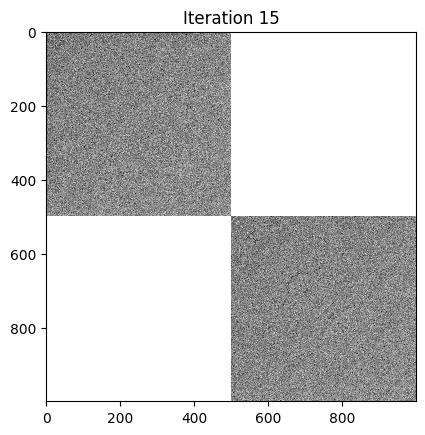

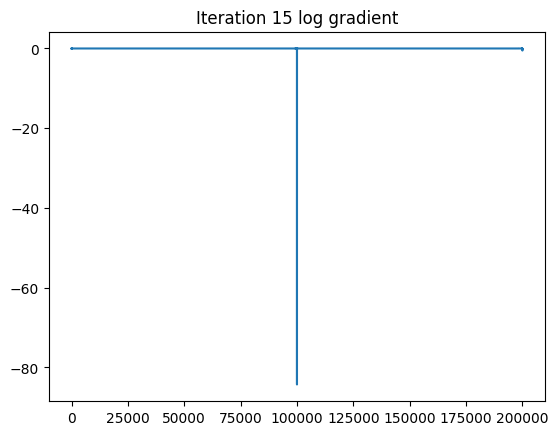

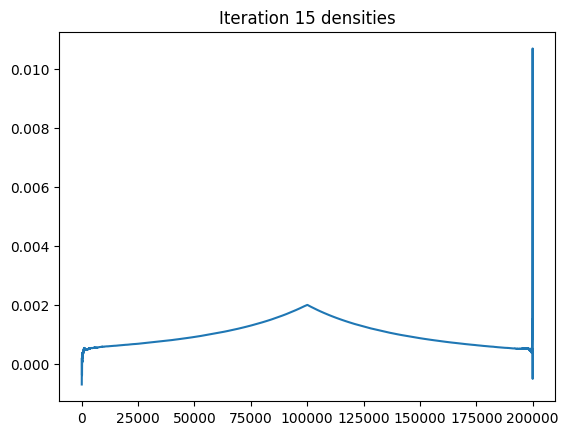

In [6]:
show_progression_images(graph, 15, 0, 0.001, 5)